## Q1


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
def findmissingVal(df):
    # Create a copy of the original dataframe
    df_complete = df.copy()

    # List of columns
    columns = df.columns.tolist()

    for col in columns:
        # Check if column has missing values
        if df[col].isnull().sum() > 0:
            # Create a new dataframe by dropping rows with missing values
            df_new = df.dropna()

            # Split the data into features (X) and target (y)
            X = df_new.drop(columns=[col])
            y = df_new[col]

            # Split the data into training and test sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Train a linear regression model
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Predict the missing values in the original dataframe
            X_missing = df[df[col].isnull()].drop(columns=[col])
            # Ensure there are no missing values in the features used for prediction
            X_missing = X_missing.dropna()
            
            # Check if X_missing is empty
            if not X_missing.empty:
                y_pred = model.predict(X_missing)

                # Fill the missing values in the original dataframe
                df_complete.loc[X_missing.index, col] = y_pred
            else:
                # If X_missing is empty, fill missing values in 'col' with the mean of 'col' in df_new
                df_complete[col].fillna(df_new[col].mean(), inplace=True)

    # If there are still any missing values, fill them with the mean of the respective column
    df_complete.fillna(df_complete.mean(), inplace=True)

    return df_complete

In [14]:
data = {'y': [410, 596, 425, 344, 324, 505, 235, 501, 400, 584, 434],
        'x1': [69, 57, 77, 81, np.nan, 53, 77, 76, 65, 97, 76],
        'x2': [125, 131, 141, 122, 141, np.nan, 141, 132, 157, 166, 141],
        'x3': [59.00, 31.75, 80.50, 75.00, 49.00, 49.35, 60.75, 41.25, 50.75, 32.25, 54.50],
        'x4': [55.66, 63.97, 45.32, 46.67, 41.21, 43.83, 41.61, 64.57, np.nan, 57.95, 57.90]}

df = pd.DataFrame(data)
df

,y,x1,x2,x3,x4
0,410,69.0,125.0,59.00,55.66
1,596,57.0,131.0,31.75,63.97
2,425,77.0,141.0,80.50,45.32
3,344,81.0,122.0,75.00,46.67
4,324,NaN,141.0,49.00,41.21
5,505,53.0,NaN,49.35,43.83
6,235,77.0,141.0,60.75,41.61
7,501,76.0,132.0,41.25,64.57
8,400,65.0,157.0,50.75,NaN
9,584,97.0,166.0,32.25,57.95


In [15]:
k=findmissingVal(df)
k

,y,x1,x2,x3,x4
0,410,69.000000,125.000000,59.00,55.660000
1,596,57.000000,131.000000,31.75,63.970000
2,425,77.000000,141.000000,80.50,45.320000
3,344,81.000000,122.000000,75.00,46.670000
4,324,93.966897,141.000000,49.00,41.210000
5,505,53.000000,189.604463,49.35,43.830000
6,235,77.000000,141.000000,60.75,41.610000
7,501,76.000000,132.000000,41.25,64.570000
8,400,65.000000,157.000000,50.75,54.239716
9,584,97.000000,166.000000,32.25,57.950000


## Q2

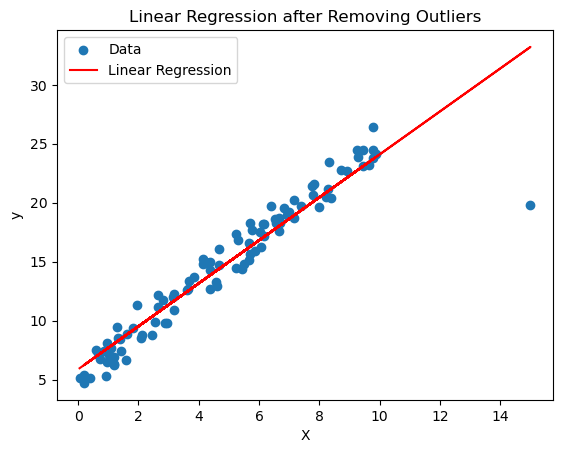

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Function to remove outliers based on z-score
def remove_outliers(dataset, z_thresh=3):
    # Calculate z-scores for each column
    z_scores = np.abs((dataset - dataset.mean()) / dataset.std())
    # Find outliers
    outliers = np.any(z_scores > z_thresh, axis=1)
    # Remove outliers
    dataset_cleaned = dataset[~outliers]
    return dataset_cleaned
 # Generate some example data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 5 + np.random.randn(100, 1)
 # Introduce some outliers
X[5] = 15
y[10] = 40
 # Remove outliers
data = np.concatenate((X, y), axis=1)
cleaned_data = remove_outliers(data)
regression_model = LinearRegression()
regression_model.fit(cleaned_data[:, :-1], cleaned_data[:, -1])
plt.scatter(cleaned_data[:, 0], cleaned_data[:, 1], label='Data')
plt.plot(cleaned_data[:, 0], regression_model.predict(cleaned_data[:, :-1]), color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression after Removing Outliers')
plt.legend()
plt.show()

In [29]:
# Provided data
data = np.array([
    [25.5, 1.74, 5.3, 10.8],
    [203.7, 6.32, 5.42, 9.4],
    [25.9, 6.22, 8.41, 7.2],
    [38.4, 10.52, 4.63, 8.5],
    [18.4, 1.19, 11.6, 9.4],
    [2.7, 1.22, 5.85, 9.9],
    [26.4, 4.1, 6.62, 8],
    [25.9, 6.32, 8.72, 9.1],
    [32, 4.08, 4.42, 8.7],
    [25.2, 4.15, 7.6, 9.2],
    [3.7, 10.15, 4.83, 9.4],
    [35.7, 1.72, 3.12, 7.6],
    [26.5, 1.7, 5.3, 8.2]])
 # Remove outliers
cleaned_data = remove_outliers(data)
 # Fit multiple linear regression
regression_model = LinearRegression()
regression_model.fit(cleaned_data[:, 1:], cleaned_data[:, 0])
 # Print coefficients
print("Intercept:", regression_model.intercept_)
print("Coefficients:", regression_model.coef_)

Intercept: 76.79845059731622
Coefficients: [-0.21001795 -0.79931192 -5.31188607]
